### **Importing necessary libraries**

In [1]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.datasets import load_digits
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
import pandas as pd
import matplotlib.pylab as plt

### **Giving the data to the model**

Using digits data from sklearn toy datasets

In [2]:
X, y = load_digits(return_X_y=True)

### **Running Linear Regression**

LR is a fundamental linear model used for predictive analysis in machine learning, aiming to establish a linear relationship between independent variables and a continuous target variable.

In [3]:
mod = LinearRegression()
mod.fit(X, y)

LinearRegression()

### **Another Model - KNN**

It predicts the target variable by averaging the values of its k nearest neighbors, where k is a hyperparameter specified by the user.

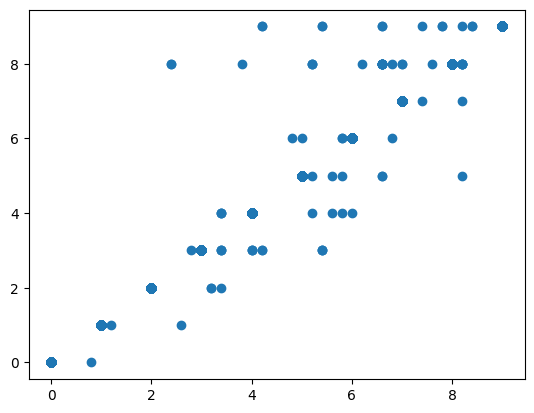

In [4]:
mod = KNeighborsRegressor()
mod.fit(X, y)
pred_knn = mod.predict(X)
plt.scatter(pred_knn, y)

### **Pipeline**

Pipeline is a sequence of data processing components, typically including data preprocessing, feature selection, and model training. Pipelines are commonly used to automate and streamline the machine learning workflow, ensuring consistency in data preprocessing and facilitating model evaluation and deployment. Scikit-learn provides a 'Pipeline' class that allows users to construct and manage such sequences of transformations and estimators.

--> scale, StandardScaler: This part of the pipeline represents a preprocessing step where the data is scaled using StandardScaler(), which standardizes features by removing the mean and scaling to unit variance.

--> model, KNeighborsRegressor: This component represents the main model in the pipeline, a KNeighborsRegressor() instance, which performs regression by predicting the target variable based on the average of the values of its nearest neighbors.

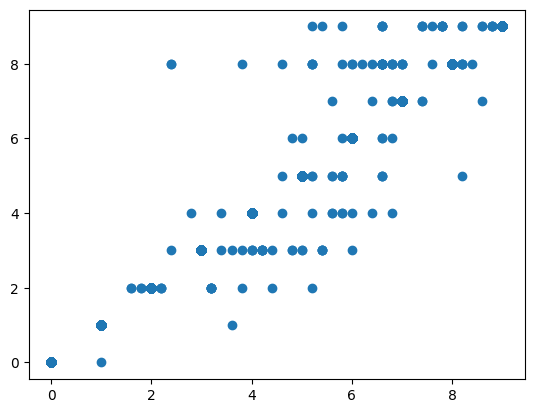

In [5]:
pipe = Pipeline([
    ("scale", StandardScaler()),
    ("model", KNeighborsRegressor())
])
pred = pipe.fit(X, y).predict(X)
plt.scatter(pred, y)

### Checking the effect of **"n_neighbors"**

n_neighbors is a hyperparameter that specifies the number of nearest neighbors to consider when making predictions for a new data point.
In our case it is set to 2. The algorithm will consider the 2 nearest neighbors to the new data point and use them to make a prediction. The predicted value could be the average (for regression tasks) or the most common class (for classification tasks) among these neighbors



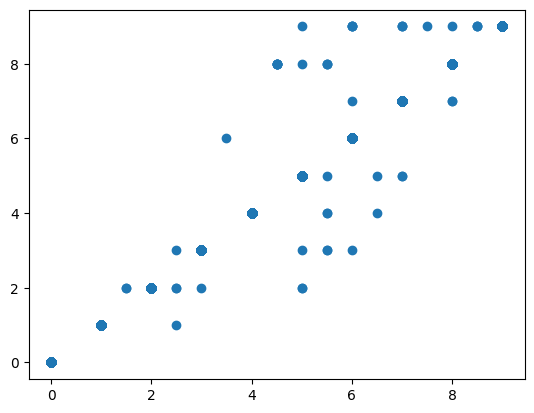

In [6]:
pipe = Pipeline([
    ("scale", StandardScaler()),
    ("model", KNeighborsRegressor(n_neighbors=2))
])
pred = pipe.fit(X, y).predict(X)
plt.scatter(pred, y)

### **Grid Search**

This is a technique for systematically searching for the best combination of hyperparameters for a given model. It exhaustively considers all parameter combinations by constructing a grid of values and evaluating the model performance for each combination.
The values [1, 2, 3, 4, 5, 6, 7, 8, 9, 10] represent the range of values for n_neighbors to be explored.
cv=3-number of folds for cross-validation. In this case, it is 3.


In [7]:
mod = GridSearchCV(estimator=pipe,
                   param_grid={
                     'model__n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
                   },
                   cv=3)
mod.fit(X, y);

### **Model Fit Statistics**
When n_neighbors is set to 4, is when the model is giving the best results.

In [8]:
pd.DataFrame(mod.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_model__n_neighbors,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,0.003908,0.003153,0.050920,0.039249,1,{'model__n_neighbors': 1},0.774883,0.836414,0.834303,0.815200,0.028522,10
1,0.001779,0.000162,0.168880,0.038898,2,{'model__n_neighbors': 2},0.841431,0.852661,0.904611,0.866234,0.027521,6
2,0.001881,0.000352,0.073286,0.045589,3,{'model__n_neighbors': 3},0.848177,0.864278,0.903994,0.872150,0.023457,3
3,0.004025,0.003268,0.080698,0.049312,4,{'model__n_neighbors': 4},0.861164,0.865673,0.902375,0.876404,0.018456,1
4,0.004746,0.001328,0.051749,0.015910,5,{'model__n_neighbors': 5},0.851978,0.863321,0.895722,0.870340,0.018535,4
5,0.007191,0.000265,0.035270,0.009403,6,{'model__n_neighbors': 6},0.864336,0.856220,0.896131,0.872229,0.017223,2
6,0.009025,0.005162,0.058549,0.029430,7,{'model__n_neighbors': 7},0.861618,0.854641,0.888639,0.868299,0.014662,5
7,0.007947,0.003063,0.093944,0.039076,8,{'model__n_neighbors': 8},0.862366,0.847335,0.885502,0.865068,0.015698,7
8,0.002446,0.001114,0.124566,0.078963,9,{'model__n_neighbors': 9},0.852945,0.844077,0.884035,0.860352,0.017133,8
9,0.001489,0.000202,0.030750,0.034443,10,{'model__n_neighbors': 10},0.853633,0.832109,0.876198,0.853980,0.018001,9
